Introduction to Data Analysis using Python

Kofi Anane Poku

Linkedin Profile : linkedin.com/in/kofi-poku-anane

Download Dataset from : 
1. https://github.com/kananep/datasets/blob/main/diabetes.csv
2. https://github.com/kananep/datasets

Table of Contents

Diabetes analysis 

Data cleaning

Data Analysis and visualization

Information fings from data .

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import plotly.express as px

C:\Users\toy\AppData\Local\Temp\ipykernel_14144\645267117.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
diabetes_analysis = pd.read_csv('./diabetes.csv')

In [3]:
diabetes_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
diabetes_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [5]:
diabetes_analysis.notnull().sum()

Pregnancies                 769
Glucose                     769
BloodPressure               769
SkinThickness               769
Insulin                     769
BMI                         769
DiabetesPedigreeFunction    769
Age                         769
Outcome                     769
dtype: int64

In [6]:
diabetes_analysis.duplicated().sum()

0

In [7]:
diabetes_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Information Visualization


In [8]:
diabetes_analysis[['Age','SkinThickness']].value_counts().sort_values()

Age  SkinThickness
60   36                1
26   13                1
     19                1
     20                1
     22                1
                      ..
25   0                10
29   0                11
27   0                12
22   0                12
21   0                12
Name: count, Length: 442, dtype: int64

In [9]:
fig = px.bar(
    diabetes_analysis,
    x='Age',
    y='SkinThickness',
    title='Age and SkinThickness Records'
)
fig.show()




In [10]:
ageSkinthickness = diabetes_analysis.sort_values('Age' ,ascending=False).head(20)
fig = px.bar(ageSkinthickness, x = 'Age', y = 'SkinThickness', color = 'Age' , title='Age and SkinThickness')
fig.show()

Observation from the graph between age and skinthickness shows that , at a particular age contain a certain amount of skinthickness with that age period.
There was no recording of skinthickness from 70 to 80 years which shows low or no skinthickness was found in the diabetes patient

Age and Pregnancies Relation Analysis using different graph representation


In [11]:
agepregnancies = diabetes_analysis[['Age','Pregnancies']].reset_index()
agepregnancies

,index,Age,Pregnancies
0,0,50,6
1,1,31,1
2,2,32,8
3,3,21,1
4,4,33,0
...,...,...,...
764,764,27,2
765,765,30,5
766,766,47,1
767,767,23,1


Text(0.5, 1.0, 'Pregnancies recorded during certain Age period')

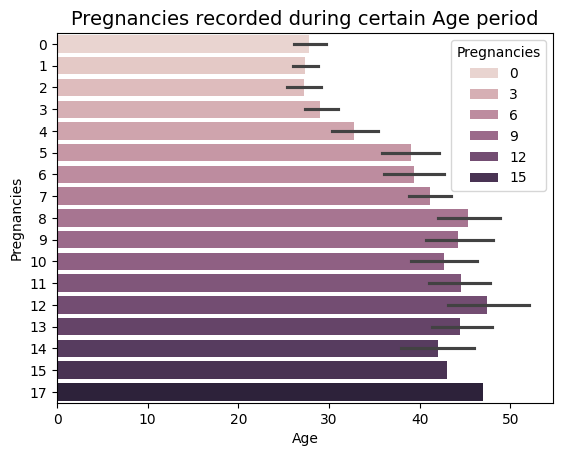

In [12]:
sns.barplot(x='Age' , y='Pregnancies', data=agepregnancies, orient='h' , hue='Pregnancies' )
plt.title('Pregnancies recorded during certain Age period' , fontsize='14')


The Observation from the graph indicate that , with in a particular age certain pergnancies were recorded. About 0 pregnancies was recorded between the ages ot 30 to 40. 6 pregnancies within 50 years and on going .

In [13]:
top14 = diabetes_analysis[['Age','Pregnancies']].value_counts().reset_index().head(14)
top14


,Age,Pregnancies,count
0,21,1,23
1,22,1,22
2,21,0,21
3,22,2,18
4,22,0,17
5,24,1,14
6,21,2,14
7,25,2,14
8,25,0,13
9,23,1,13


<Axes: xlabel='Age', ylabel='Pregnancies'>

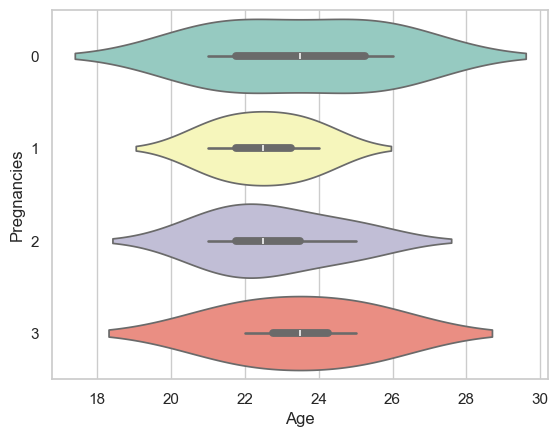

In [14]:
sns.set_theme(style='whitegrid')
#plt.figure(10,10)
sns.violinplot(data=top14,x='Age', y='Pregnancies' , orient ='h' , hue='Pregnancies' ,legend=False, palette='Set3')

This graph also shows the age and pregnancy recording between age period using the medium and density rating. The white bar in the middle of the violin graph indicated the medium and the middle of the pregnancy rate and the up and down rising of the shape of the graph shows level of pregnancy recorded at a particular age

Age and BloodPressure using different graph representation

In [15]:
diabetes_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [16]:
ageBloodPressure = diabetes_analysis[['Age','BloodPressure']].sort_values(ascending=False , by='Age')
ageBloodPressure

,Age,BloodPressure
459,81,74
453,72,0
666,70,82
123,69,80
684,69,82
...,...,...
60,21,0
571,21,96
372,21,64
240,21,64


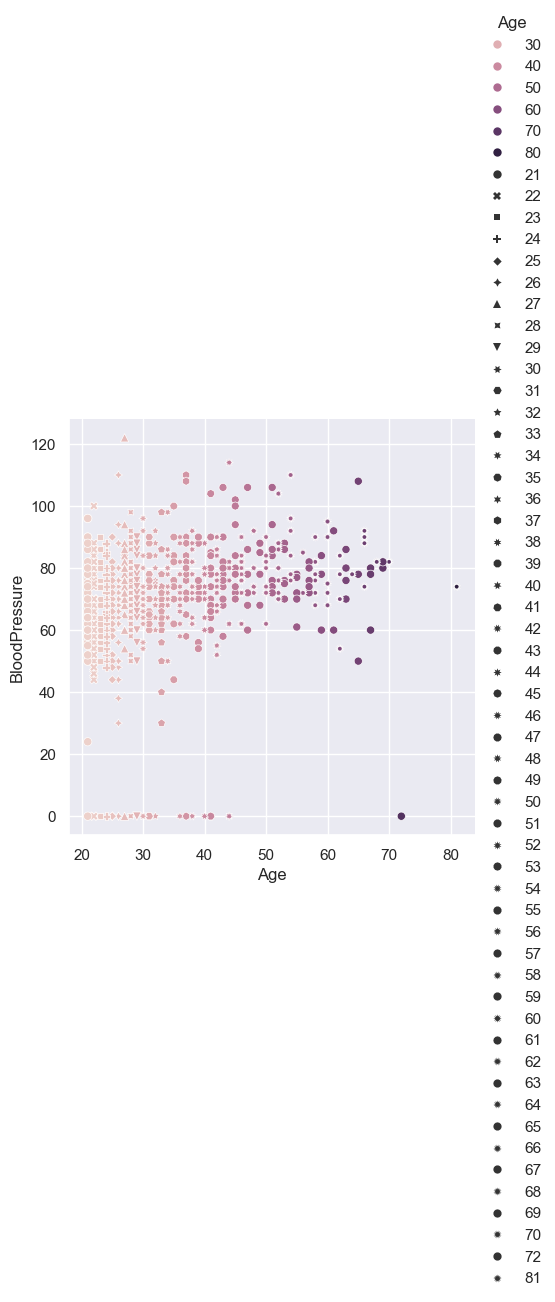

In [17]:
sns.set_theme()
sns.relplot(
    data=ageBloodPressure,
    x="Age", y="BloodPressure",
    hue="Age", style="Age",
)

This histplot below shows the Age representing the blue and the plae orange representing the BloodPressure . The Age begins from 20 to 80 showing the relation with the Blood Pressure beginning from 0 to 120.

The height of the age bar and the bloodpressure bar at the same level shows the particular age and the particular bloodpressure level.

<Axes: ylabel='Count'>

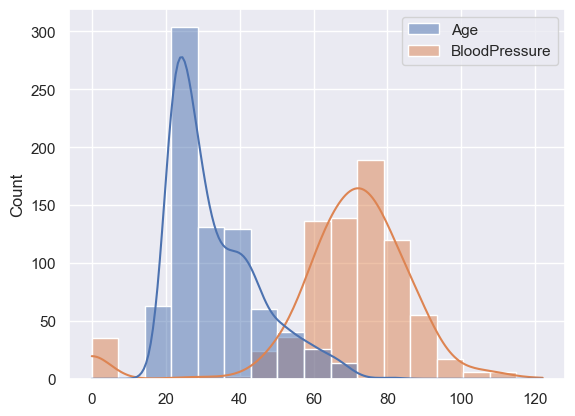

In [18]:
sns.histplot(ageBloodPressure, kde=True)

Age and Glucose

In [19]:
ageGlucose = diabetes_analysis[['Age','Glucose']]
ageGlucose

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137
...,...,...
764,27,122
765,30,121
766,47,126
767,23,93


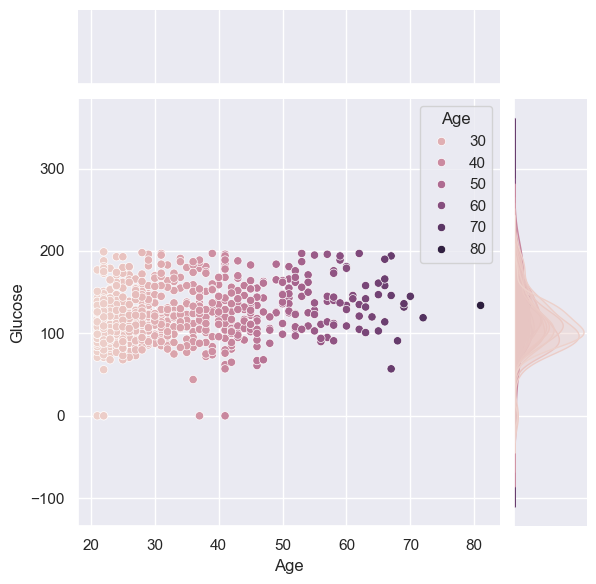

In [20]:
sns.jointplot(data=ageGlucose,x='Age', y='Glucose', hue='Age') 


The observation from the age and glusoce graph shows the hue density from light to darker,
which shows that the darker side shows the age representation in the hue list of the age and vice versa to the lighter side

Age and Insulin

In [21]:
ageInsulin = diabetes_analysis[['Age','Insulin']].sort_values(ascending=False , by='Age').head(20)
ageInsulin

,Age,Insulin
459,81,60
453,72,0
666,70,0
123,69,0
684,69,0
674,68,0
489,67,0
363,67,0
537,67,0
759,66,0


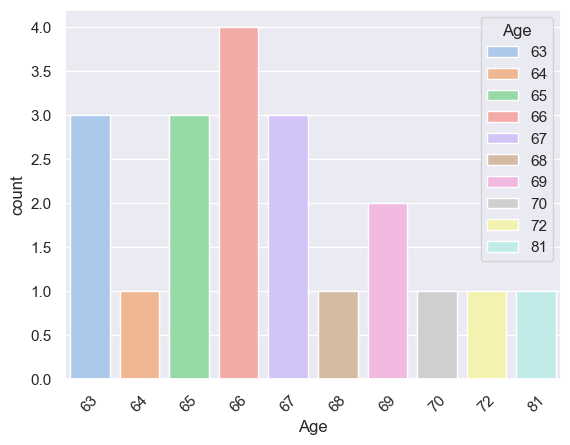

In [22]:
# count plot (show the counts of observations in each categorical bin)
# plt.figure(figsize=(10, 4))
sns.countplot(x='Age', data=ageInsulin, hue='Age', palette='pastel');
plt.xticks(rotation=45);

This graph shows the observation of the counting of glucose within a patient at a perticular age period.

Age and BMI

In [23]:
ageBMI = diabetes_analysis[['Age','BMI']].value_counts().reset_index().head(10)
ageBMI

,Age,BMI,count
0,21,0.0,3
1,28,31.6,3
2,27,32.4,3
3,45,32.8,3
4,21,24.7,3
5,22,32.0,3
6,21,30.8,3
7,25,31.6,3
8,22,0.0,2
9,33,29.7,2


Text(0.5, 1.0, 'BMI recorded during certain Age period')

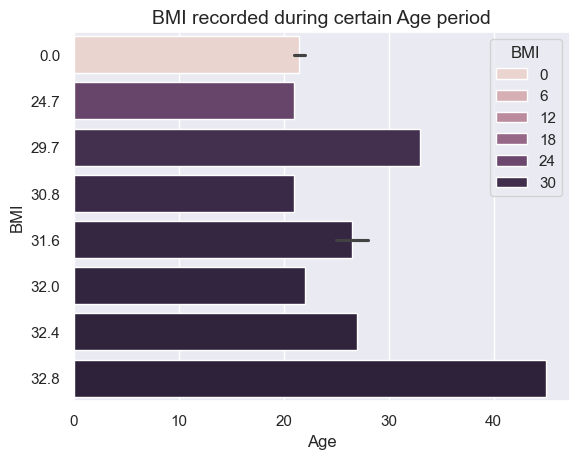

In [24]:
#diabetes_analysis.groupby('Age').BMI.hist(alpha=0.4).head(10)

sns.barplot(x='Age' , y='BMI', data=ageBMI, orient='h' , hue='BMI' )
plt.title('BMI recorded during certain Age period' , fontsize='14')

The observation of the graph shows the BMI ,the weight in relation to age. Overweight is a BMI greater than 25 and obese is a BMI greater than 30

Age and Diabetes Pedigree Function

In [25]:
ageDiabetes = diabetes_analysis[['Age','DiabetesPedigreeFunction']].value_counts().reset_index().head(20)
ageDiabetes

,Age,DiabetesPedigreeFunction,count
0,25,0.591,2
1,25,0.336,2
2,23,0.678,2
3,21,0.299,2
4,39,0.270,2
5,27,0.340,2
6,21,0.559,2
7,22,0.140,2
8,27,0.207,2
9,50,0.178,2


Text(0.5, 1.0, 'Age and its correlate Diabetes Pedigre Function.')

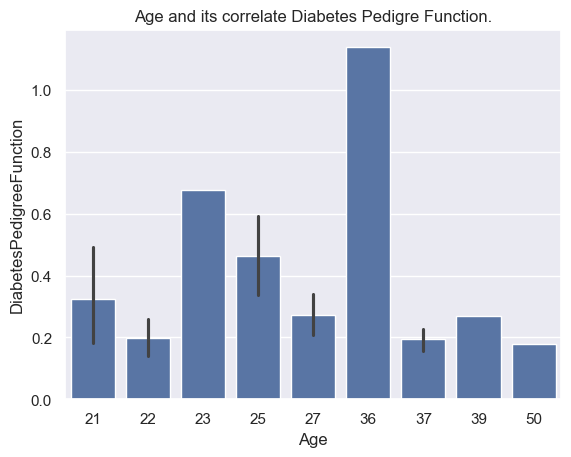

In [26]:
sns.barplot(data=ageDiabetes , x='Age', y='DiabetesPedigreeFunction' )
plt.title('Age and its correlate Diabetes Pedigre Function.')

Age and its Diabetes Pedigree Function shows the age and its corresponding diabetes pedigree function


Result and Observation .

The graphs displayed shows each age period and its correlate function or problem based on the dataset such as the glucose, BMI and other headings in the dataset
